In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)
import altair as alt
pd.set_option('display.max_rows', 500)
import numpy as np

In [120]:
author = pd.read_csv('../data/ht_class/ht_cleaned_author_df.csv')
paper = pd.read_csv('../data/ht_class/ht_cleaned_paper_df.csv')

### Number of publications by year

In [121]:
pub_num_df = paper.groupby(
    'Year').size().reset_index(name = 'Number of Publications')
pub_num_df['Year'] = pd.to_datetime(
    pub_num_df['Year'], format="%Y"
)
pub_num_df.head()

,Year,Number of Publications
0,1990-01-01,52
1,1991-01-01,48
2,1992-01-01,51
3,1993-01-01,55
4,1994-01-01,52


In [122]:
pub_num_df.tail()

,Year,Number of Publications
27,2017-01-01,114
28,2018-01-01,127
29,2019-01-01,129
30,2020-01-01,157
31,2021-01-01,169


### Number of unique authors

In [123]:
# how many rows miss openalex author id
author[author['OpenAlex Author ID'].isnull()].shape[0]

101

In [124]:
author_with_author_id = author[
    author['OpenAlex Author ID'].notnull()]

In [125]:
unique_author_num_df = author_with_author_id.groupby(
    'Year')['OpenAlex Author ID'].nunique().reset_index(
    name = 'Number of Unique Authors')
unique_author_num_df['Year'] = pd.to_datetime(
    unique_author_num_df['Year'], format="%Y",
)
unique_author_num_df.head()

,Year,Number of Unique Authors
0,1990-01-01,118
1,1991-01-01,120
2,1992-01-01,119
3,1993-01-01,116
4,1994-01-01,127


In [126]:
unique_author_num_df.tail()

,Year,Number of Unique Authors
27,2017-01-01,455
28,2018-01-01,494
29,2019-01-01,551
30,2020-01-01,639
31,2021-01-01,673


### Non-VIS VS VIS citations

In [127]:
# VIS PAPERS' OPENALEX IDS
ids = paper['OpenAlex ID'].tolist()
len(list(set(ids))) == paper.shape[0]

True

In [128]:
# Yes, I should not use the unique paper df
ref = pd.read_csv('../data/processed/openalex_reference_paper_df.csv')
ref = ref[ref['OpenAlex ID'].notnull()]

In [129]:
cit = pd.read_csv('../data/processed/openalex_citation_paper_df.csv')
cit = cit[cit['Citation Paper OpenAlex ID'].notnull()]

In [130]:
ref['VIS'] = ref['OpenAlex ID'].apply(
    lambda x: 'Yes' if x in ids else 'No'
)

In [131]:
cit['VIS'] = cit['Citation Paper OpenAlex ID'].apply(
    lambda x: 'Yes' if x in ids else 'No'
)

In [132]:
tuples = []
for group in cit.groupby('OpenAlex Year'):
    year = group[0]
    total = group[1].shape[0]
    for subgroup in group[1].groupby('VIS'):
        type_of_paper = subgroup[0] # true or false
        count = subgroup[1].shape[0]
        ratio = count / total
        tuples.append((year, type_of_paper, count, ratio))

In [133]:
cit_df = pd.DataFrame(list(tuples), columns=['year', 'type', 'count', 'ratio']) 

In [134]:
cit_df = cit_df[(cit_df.year >= 1990) & (cit_df.year <= 2021)]
cit_df['Year'] = pd.to_datetime(cit_df['year'], format='%Y')
cit_df.replace({'Yes': 'VIS', 'No': 'Non-VIS'}, inplace=True)
cit_df.head()

,year,type,count,ratio,Year
2,1990.0,Non-VIS,6,0.750000,1990-01-01
3,1990.0,VIS,2,0.250000,1990-01-01
4,1991.0,Non-VIS,58,0.734177,1991-01-01
5,1991.0,VIS,21,0.265823,1991-01-01
6,1992.0,Non-VIS,128,0.695652,1992-01-01


In [135]:
cit_df[cit_df.year.isin([2021, 2011])]

,year,type,count,ratio,Year
44,2011.0,Non-VIS,6173,0.889994,2011-01-01
45,2011.0,VIS,763,0.110006,2011-01-01
64,2021.0,Non-VIS,11353,0.850667,2021-01-01
65,2021.0,VIS,1993,0.149333,2021-01-01


### Average number of authors

In [136]:
author_num_df = paper.groupby(
    'Year')['Number of Authors'].mean().to_frame().reset_index()
author_num_df.tail()

,Year,Number of Authors
27,2017,4.728070
28,2018,4.629921
29,2019,5.255814
30,2020,5.050955
31,2021,4.988166


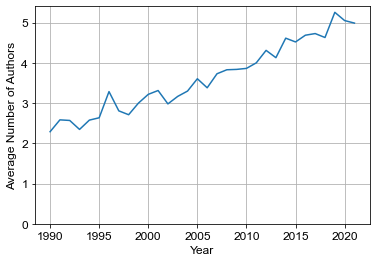

In [137]:
g = sns.lineplot(x='Year', 
                 y='Number of Authors', 
                 data = author_num_df)
g.set_ylim(0,)
g.set_ylabel('Average Number of Authors')
plt.grid()

### Number of participating countries

In [138]:
year_1990_paper = paper[paper.Year == 1990]
year_1990_cross_country = year_1990_paper[
    year_1990_paper['Cross-country Collaboration']==True]
year_1990_cross_country_dois = year_1990_cross_country.DOI.tolist()

In [139]:
year_1990_cross_country

,Conference,Year,Title,DOI,FirstPage,LastPage,PaperType,OpenAlex Year,OpenAlex Publication Date,OpenAlex ID,...,Number of Authors,Cross-type Collaboration,Cross-country Collaboration,With US Authors,Both Cross-type and Cross-country Collaboration,IEEE Title,Citation Counts on Google Scholar,Award,Award Name,Award Track
1041,Vis,1990,Methods for surface interrogation,10.1109/VISUAL.1990.146381,187.0,"193, 472",C,1990,1990-10-23,W2103253409,...,3.0,True,True,True,True,Methods for surface interrogation,56.0,False,NaN,NaN
2153,Vis,1990,A journey into the fourth dimension,10.1109/VISUAL.1990.146385,219.0,"229, 476-477",C,1990,1990-10-23,W2149054233,...,2.0,False,True,True,False,A journey into the fourth dimension (visualiza...,16.0,False,NaN,NaN


In [140]:
author[author.DOI.isin(year_1990_cross_country.DOI)]

,Year,DOI,Title,Number of Authors,Author Position,Author Name,OpenAlex Author ID,Affiliation Name,Affiliation Country Code,Affiliation Type,Binary Type,Cross-type Collaboration,International Collaboration
3611,1990,10.1109/VISUAL.1990.146381,Methods for surface interrogation,3.0,1.0,H. Hagen,https://openalex.org/A2237445521,"FB-Informatik, Universität Kaiserslautern",DE,education,education,True,True
3612,1990,10.1109/VISUAL.1990.146381,Methods for surface interrogation,3.0,2.0,T. Schreiber,https://openalex.org/A2973511128,"FB-Informatik, Universität Kaiserslautern",DE,education,education,True,True
3613,1990,10.1109/VISUAL.1990.146381,Methods for surface interrogation,3.0,3.0,E. Gschwind,https://openalex.org/A1980220218,"Mechanical Design Division, Hewlett-Packard GmbH",US,company,non-education,True,True
7741,1990,10.1109/VISUAL.1990.146385,A journey into the fourth dimension,2.0,1.0,Y. Ke,https://openalex.org/A2684845787,"Department of Computational Science, Universit...",CA,education,education,False,True
7742,1990,10.1109/VISUAL.1990.146385,A journey into the fourth dimension,2.0,2.0,E.S. Panduranga,https://openalex.org/A2302757246,"Department of Computer Sciences, Johns Hopkins...",US,education,education,False,True


### Cross country collaboration

In [141]:
def get_total_and_ratio_by_year(DF, BY, subgroup_par):
    tuples = []
    for group in DF.groupby(BY):
        year = group[0]
        total = group[1].shape[0]
        for subgroup in group[1].groupby(subgroup_par):
            subtype = 'Yes' if subgroup[0] else 'No'
            count = subgroup[1].shape[0]
            ratio = count / total
            tuples.append((year, subtype, count, ratio))
    dff = pd.DataFrame(
        list(tuples), columns=['year', 'type', 'count', 'ratio']) 
    return dff

In [142]:
cross_country = get_total_and_ratio_by_year(
    paper, 
    'Year',
    'Cross-country Collaboration'
)

In [159]:
cross_country.head()

,year,type,count,ratio
0,1990,No,50,0.961538
1,1990,Yes,2,0.038462
2,1991,No,46,0.958333
3,1991,Yes,2,0.041667
4,1992,No,45,0.882353


In [143]:
cross_country[cross_country.year.isin([2004, 2005, 2006, 2003, 2013, 2012, 2014, 2021])]

,year,type,count,ratio
26,2003,No,90,0.882353
27,2003,Yes,12,0.117647
28,2004,No,79,0.814433
29,2004,Yes,18,0.185567
30,2005,No,96,0.806723
31,2005,Yes,23,0.193277
32,2006,No,85,0.752212
33,2006,Yes,28,0.247788
44,2012,No,75,0.646552
45,2012,Yes,41,0.353448


#### Author chord

In [160]:
author_chord = pd.read_csv('../data/plots/author_chord_df.csv')
node1, node2 = author_chord.source, author_chord.target
unique_cntry = list(set(node1.append(node2).tolist()))

In [161]:
author_chord.value.sum()

1221

In [162]:
author_chord.head()

,source,target,value
0,CN,US,116
1,DE,US,114
2,CA,US,78
3,FR,US,59
4,GB,US,54


In [163]:
tuples = []
for i in unique_cntry:
    dff = author_chord[(author_chord.source == i) | (author_chord.target == i)]
    total = dff.value.sum()
    tuples.append((i, total))

In [148]:
collab_df = pd.DataFrame(list(tuples), columns = ['country', 'value']).sort_values(
    by=['value'], ascending = False).reset_index(drop=True)
collab_df.value.sum()
most_active_cntry = collab_df.head(10).country.tolist()
# Number of pairs where the most active countries appeared
author_chord[(
    author_chord.source.isin(most_active_cntry)) | (
    author_chord.target.isin(most_active_cntry))].value.sum()
# most_active_cntry

1196

In [164]:
most_active_cntry

['US', 'DE', 'CN', 'AT', 'GB', 'FR', 'CA', 'NL', 'CH', 'AU']

In [150]:
1196/1221

0.9795249795249795

In [149]:
# Number of pairs made up by collaborations between most active countries
author_chord[(
    author_chord.source.isin(most_active_cntry)) & (
    author_chord.target.isin(most_active_cntry))].value.sum()

845

In [151]:
845/1221

0.6920556920556921

### Cross-type collaboration

In [154]:
cross_type = get_total_and_ratio_by_year(
    paper, 
    'Year',
    'Cross-type Collaboration'
)
cross_type.head()

,year,type,count,ratio
0,1990,No,47,0.903846
1,1990,Yes,5,0.096154
2,1991,No,40,0.833333
3,1991,Yes,8,0.166667
4,1992,No,39,0.764706


In [158]:
cross_type[cross_type.year.isin([2006, 2007, 2018, 2021])]

,year,type,count,ratio
32,2006,No,93,0.823009
33,2006,Yes,20,0.176991
34,2007,No,72,0.672897
35,2007,Yes,35,0.327103
56,2018,No,72,0.566929
57,2018,Yes,55,0.433071
62,2021,No,119,0.704142
63,2021,Yes,50,0.295858
